In [1]:
import pandas as pd
#import pandas.DataFrame as df
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
df = pd.read_csv('BaynesSoundMooring_5mbss_ConductivityTemperatureDepth_20200117T030000Z_20200119T235959Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity',df.columns[15]: 'Temperature'},inplace=True)
X = df[['Conductivity','Temperature']].values

In [3]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X = pd.DataFrame(X_principal) 

Text(0.5, 0, 'Number of clusters')

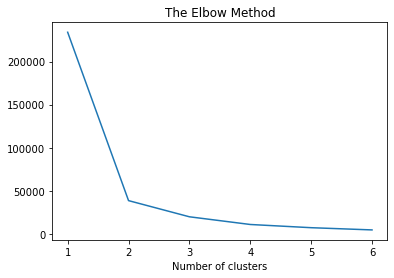

In [4]:
# How many possible clusters?
from sklearn.cluster import KMeans

Km = []
for i in range(1,7):
    kmeans = KMeans(n_clusters = i,
                   init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    Km.append(kmeans.inertia_)
plt.plot(range(1,7),Km)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")

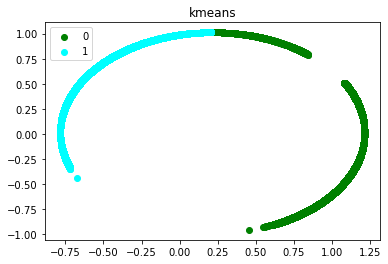

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

#predictions from kmeans
pred = kmeans.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['green','cyan']
for k in range(0,2):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k],label =k)
    
plt.legend(loc="upper left")
plt.title('kmeans')

plt.show()